In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

servey = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

servey.info()
servey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.5+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [13]:

servey2012 = servey[servey['year']==6]

servey2014 = servey[servey['year']==7]

print(servey2012.head())
print(servey2014.head())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH     5     6      3        3       10       5      8        5       4   
1    CH    25     6      6        5        7       5      9        3       2   
2    CH    26     6      1        8        8       8      7        6       3   
3    CH    28     6      4        6        6       7     10        6       2   
4    CH    29     6      5        6        7       5      8        7       2   

   gndr  agea  partner  
0     2    60        1  
1     2    59        1  
2     1    24        2  
3     2    64        1  
4     2    55        1  
    cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
732    CH     5     7      2        8        9       7      9        6   
733    CH    25     7      4        4        2       5      6        5   
734    CH    26     7      3        8        8       6      8        7   
735    CH    28     7      2        7        7       5      9        6   

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


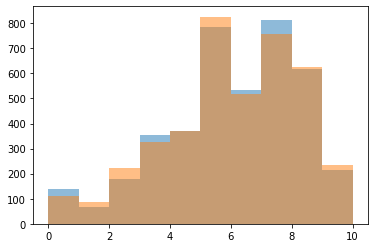

In [14]:
plt.hist(servey2012['ppltrst'], alpha = .5)
plt.hist(servey2014['ppltrst'], alpha = .5)


stats.shapiro(servey2012['ppltrst'])
stats.shapiro(servey2014['ppltrst'])

print(stats.describe(servey2012['ppltrst']))
print(stats.describe(servey2014['ppltrst']))


In [15]:
## The p-Value is above .05 it needs to be lower in order to continue there is no sifgnificant difference.


DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


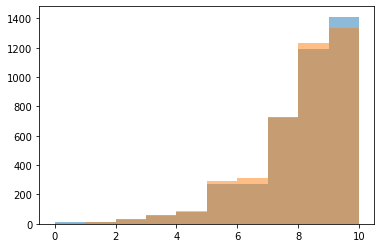

In [16]:
#Did people become happier from 2012 to 2014?

plt.hist(servey2012['happy'], alpha = .5)
plt.hist(servey2014['happy'], alpha = .5)


stats.shapiro(servey2012['happy'])
stats.shapiro(servey2014['happy'])

print(stats.describe(servey2012['happy']))
print(stats.describe(servey2014['happy']))



In [17]:
stats.kruskal(servey2012['happy'], servey2014['happy'])
# Displaying the graph will look the same as above, we have the p value where we want it.


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [18]:
# 3. Pick three or four of the countries in the sample and compare 
#how often people met socially in 2014. Are there differences, 
#and if so, which countries stand out?

servey2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20201f60>,
      dtype=object)

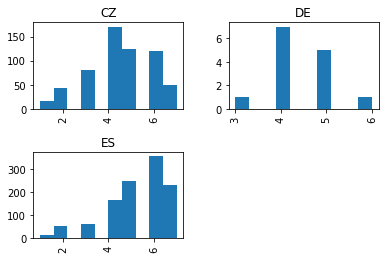

In [19]:
# I am going to pick CZ, DE and ES
filterList = ['CZ', 'DE', 'ES']

servey2014CzDeEs = servey2014[servey2014['cntry'].isin(filterList)]

servey2014CzDeEs['cntry'].unique()

servey2014CzDeEs['sclmeet'].hist(by = servey2014CzDeEs['cntry'])


Country DE stands out more,people there rarely meet socially. People in Countries CZ and ES often meet socially.

In [23]:
stats.kruskal(
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'CZ',['sclmeet']],
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'DE',['sclmeet']],
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

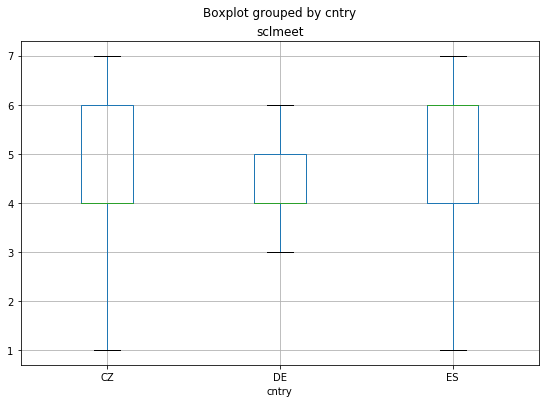

In [24]:
servey2014CzDeEs.boxplot('sclmeet', by='cntry', figsize=(9, 6))

Country DE stands out its not associated with CZ and ES countries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a201040f0>,
      dtype=object)

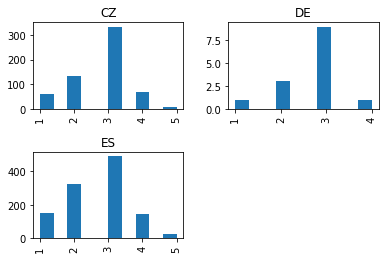

In [28]:
chosenThree = ['CZ', 'DE', 'ES']

chooseThree = servey2014[servey2014['cntry'].isin(filterList)]

chooseThree['cntry'].unique()

chooseThree['sclact'].hist(by = chooseThree['cntry'])



In [29]:
stats.f_oneway(
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'CZ',['sclact']],
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'DE',['sclact']],
    servey2014CzDeEs.loc[servey2014CzDeEs['cntry'] == 'ES',['sclact']])


F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

The visual graph above and the P-value does not indicate a major difference in social activities with all countries.

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

ruffTest = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
ruffTest.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [31]:
ruffTest['Measurement'].unique()

array(['Measurement 1 (2003-2006)', 'Measurement 2 (2006-2008)',
       'Measurement 3 (2008-2012)'], dtype=object)

In [32]:
ruffUnique = ruffTest.pivot(index='Casenr', columns='Measurement', values='Unique')
ruffUnique.head()


Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


There is not a significance difference. Measurements are very much distributed evenly

Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [33]:
ruffPersev = ruffTest.pivot(index='Casenr', columns='Measurement', values='Perseverative')
ruffPersev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


This is not normally distributed, this pivot table shows significant difference.

(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

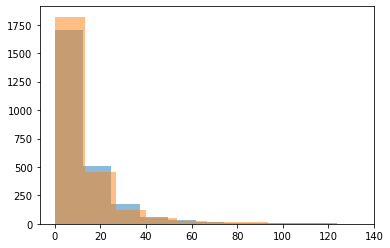

In [34]:
plt.hist(ruffPersev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(ruffPersev['Measurement 2 (2006-2008)'], alpha = .5)


In [38]:
stats.kruskal(ruffPersev['Measurement 2 (2006-2008)'], ruffPersev['Measurement 3 (2008-2012)'])

KruskalResult(statistic=4.888785605096552, pvalue=0.027031693666595576)

There is a significant difference between perseverative errors with the same participants at Measurements 2 and 3